In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Conv2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers
from keras.initializers import he_uniform
import time

In [5]:
# Define image size
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16

In [6]:
main_folder = 'D:\\malarie\\dataset\\cell_images\\cell_images'
subfolder_1 = os.path.join(main_folder, 'Parasitized')
subfolder_2 = os.path.join(main_folder, 'Uninfected')

files_1 = os.listdir(subfolder_1)
files_2 = os.listdir(subfolder_2)

file_paths_1 = [os.path.join(subfolder_1, f) for f in files_1 if f.endswith('.png')]
file_paths_2 = [os.path.join(subfolder_2, f) for f in files_2 if f.endswith('.png')]

labels_1 = [1] * len(file_paths_1)
labels_2 = [0] * len(file_paths_2)

file_paths = file_paths_1 + file_paths_2
labels = labels_1 + labels_2

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

# Split train set into train and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [7]:
len(X_train),len(X_val),len(X_test),len(y_train),len(y_val),len(y_test)

(22046, 2756, 2756, 22046, 2756, 2756)

In [8]:
import numpy as np

# Create a function for preprocessing images 
def process_image(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    # Read in an image file
    image = tf.io.read_file(image_path)
    # Turn the PNG image into numerical Tensor with 3 colour channels (Red, Green, Blue)
    image = tf.image.decode_png(image, channels=3)
    # Convert the colour channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Rescale the pixel values of the image to the range [0, 1]
    image = (image - tf.reduce_min(image)) / (tf.reduce_max(image) - tf.reduce_min(image))
    #Resize image
    image = tf.image.resize(image, [img_height, img_width], method=tf.image.ResizeMethod.BICUBIC)
    return image

In [9]:
# Horizontal flip
def flip_left_right(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    image = process_image(image_path)
    image=tf.image.flip_left_right(image)
    return image

In [10]:
# Vertical flip
def flip_up_down(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    image = process_image(image_path)
    image=tf.image.flip_up_down(image)
    return image

In [11]:
# Rotate 90 degrees
def rotate(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    image = process_image(image_path)
    image = tf.image.rot90(image)
    return image

In [12]:
# Darkening
def darken(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    darken_factor = random.uniform(0, 0.5)
    image = process_image(image_path)
    image = tf.image.adjust_brightness(image, -darken_factor)
    return image

In [13]:
# Lightening
def lighten(image_path, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    lighten_factor = random.uniform(0, 0.5)
    image = process_image(image_path)
    image = tf.image.adjust_brightness(image, lighten_factor)
    return image

In [14]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
    image = process_image(image_path)
    return image, label

In [15]:
# Create a simple function to return a tuple (image, label)
def get_flipped_lr_image_label(image_path, label):
    image = flip_left_right(image_path)
    return image, label

In [16]:
# Create a simple function to return a tuple (image, label)
def get_flipped_ud_image_label(image_path, label):
    image = flip_up_down(image_path)
    return image, label

In [17]:
# Create a simple function to return a tuple (image, label)
def get_rotated_image_label(image_path, label):
    image = rotate(image_path)
    return image, label

In [18]:
# Create a simple function to return a tuple (image, label)
def get_darken_image_label(image_path, label):
    image = darken(image_path)
    return image, label

In [19]:
# Create a simple function to return a tuple (image, label)
def get_lighten_image_label(image_path, label):
    image = lighten(image_path)
    return image, label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

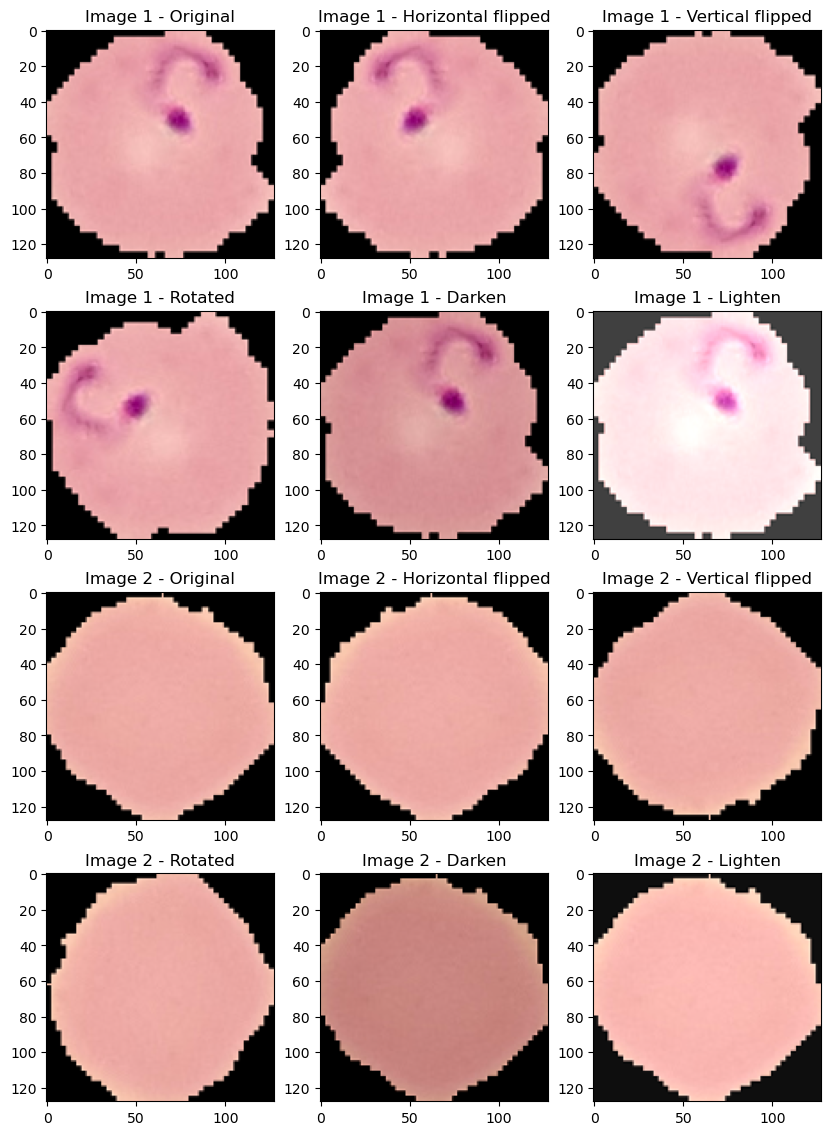

In [20]:
import matplotlib.pyplot as plt
import random
# Example image paths
image_path_1 = X_train[0]
image_path_2 = X_train[2]

# Preprocess the original images
image_1_original = process_image(image_path_1)
image_2_original = process_image(image_path_2)

# Preprocess and augment the images
image_1_flipped_lr = flip_left_right(image_path_1)
image_1_flipped_ud = flip_up_down(image_path_1)
image_1_rotated = rotate(image_path_1)
image_1_darken = darken(image_path_1)
image_1_lighten = lighten(image_path_1)

image_2_flipped_lr = flip_left_right(image_path_2)
image_2_flipped_ud = flip_up_down(image_path_2)
image_2_rotated = rotate(image_path_2)
image_2_darken = darken(image_path_2)
image_2_lighten = lighten(image_path_2)

# Plot the images side by side
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,14))
axes[0,0].imshow(image_1_original)
axes[0,0].set_title("Image 1 - Original")
axes[0,1].imshow(image_1_flipped_lr)
axes[0,1].set_title("Image 1 - Horizontal flipped")
axes[0,2].imshow(image_1_flipped_ud)
axes[0,2].set_title("Image 1 - Vertical flipped")
axes[1,0].imshow(image_1_rotated)
axes[1,0].set_title("Image 1 - Rotated")
axes[1,1].imshow(image_1_darken)
axes[1,1].set_title("Image 1 - Darken")
axes[1,2].imshow(image_1_lighten)
axes[1,2].set_title("Image 1 - Lighten")
axes[2,0].imshow(image_2_original)
axes[2,0].set_title("Image 2 - Original")
axes[2,1].imshow(image_2_flipped_lr)
axes[2,1].set_title("Image 2 - Horizontal flipped")
axes[2,2].imshow(image_2_flipped_ud)
axes[2,2].set_title("Image 2 - Vertical flipped")
axes[3,0].imshow(image_2_rotated)
axes[3,0].set_title("Image 2 - Rotated")
axes[3,1].imshow(image_2_darken)
axes[3,1].set_title("Image 2 - Darken")
axes[3,2].imshow(image_2_lighten)
axes[3,2].set_title("Image 2 - Lighten")
# plt.savefig("D:\\malarie\\graphics\\augmented_images_paper")
plt.show()

In [21]:
def create_data_batches(X, y, batch_size=BATCH_SIZE, test_data=False, augment_data=False):
    # If the data is a test/validation dataset, we don't need to shuffle it
    if test_data:
        print("Creating test/validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                               tf.constant(y))) 
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))
        # Add data augmentation if specified
        if augment_data:
            data_flipped_lr = data.map(get_flipped_lr_image_label)
            data_flipped_ud = data.map(get_flipped_ud_image_label)
            data_rotated = data.map(get_rotated_image_label)
            data_darken = data.map(get_darken_image_label)
            data_lighten = data.map(get_lighten_image_label)
            data = data.map(get_image_label)
            data = data.concatenate(data_flipped_lr)
            data = data.concatenate(data_flipped_ud)
            data = data.concatenate(data_rotated)
            data = data.concatenate(data_darken)
            data = data.concatenate(data_lighten)
        else:
            data = data.map(get_image_label)
        # Turn the training data into batches
        data_batch = data.batch(BATCH_SIZE)
        print("Dataset length:", tf.data.experimental.cardinality(data).numpy())
        return data_batch

In [22]:
train_data = create_data_batches(X_train, y_train, augment_data=False)
val_data = create_data_batches(X_val, y_val, test_data=True)
test_data=create_data_batches(X_test, y_test, test_data=True)

Creating training data batches...
Dataset length: 22046
Creating test/validation data batches...
Creating test/validation data batches...


In [38]:
# View string representation of datasets
print('========================================')
print('Train Input Data Pipeline:\n\n', train_data)
print('========================================')
print('Validation Input Data Pipeline:\n\n', val_data)
print('========================================')
print('Test Input Data Pipeline:\n\n', test_data)
print('========================================')

Train Input Data Pipeline:

 <BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>
Validation Input Data Pipeline:

 <BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>
Test Input Data Pipeline:

 <BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>


In [39]:
def create_VGG():
    base_model= VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model=Sequential()
    model.add(base_model)
    model.add(Flatten())
        
    model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.3))
    
    model.add(Dense(1, activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.00001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [40]:
def create_VGG_last_2():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    # Freeze all layers except the last two convolutional layers
    for layer in base_model.layers[:-2]:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(Flatten())

    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(learning_rate=0.00001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [41]:
def create_VGG_last_4():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    # Freeze all layers except the last four convolutional layers
    for layer in base_model.layers[:-4]:
        if 'conv' in layer.name:
            print(layer.name)
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(Flatten())

    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(learning_rate=0.00001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [23]:
def create_VGG_all():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    model = Sequential()
    model.add(base_model)
    model.add(Flatten())

    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(learning_rate=0.00001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [43]:
VGG=create_VGG()
VGG.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [44]:
VGG_2=create_VGG_last_2()
VGG_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 4,457,473
Non-trainable params: 12,354,880
_________________________________________________________________


In [45]:
VGG_4=create_VGG_last_4()
VGG_4.summary()

block1_conv1
block1_conv2
block2_conv1
block2_conv2
block3_conv1
block3_conv2
block3_conv3
block4_conv1
block4_conv2
block4_conv3
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_____________________________________

In [46]:
VGG_all=create_VGG_all()
VGG_all.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Create a callback to reduce the learning rate when the validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

In [25]:
EPOCHS=10

## VGG in care s-au inghetat toate layerele

Epoch 1/10
1378/1378 [==============================] - 59s 35ms/step - loss: 0.3648 - accuracy: 0.8465 - val_loss: 0.2317 - val_accuracy: 0.9173
Epoch 2/10
1378/1378 [==============================] - 50s 36ms/step - loss: 0.2264 - accuracy: 0.9186 - val_loss: 0.1859 - val_accuracy: 0.9321
Epoch 3/10
1378/1378 [==============================] - 48s 35ms/step - loss: 0.1923 - accuracy: 0.9306 - val_loss: 0.1694 - val_accuracy: 0.9416
Epoch 4/10
1378/1378 [==============================] - 48s 35ms/step - loss: 0.1775 - accuracy: 0.9363 - val_loss: 0.1660 - val_accuracy: 0.9372
Epoch 5/10
1378/1378 [==============================] - 48s 35ms/step - loss: 0.1673 - accuracy: 0.9385 - val_loss: 0.1542 - val_accuracy: 0.9456
Epoch 6/10
1378/1378 [==============================] - 48s 35ms/step - loss: 0.1599 - accuracy: 0.9424 - val_loss: 0.1534 - val_accuracy: 0.9438
Epoch 7/10
1378/1378 [==============================] - 48s 35ms/step - loss: 0.1528 - accuracy: 0.9436 - val_loss: 0.1470 -

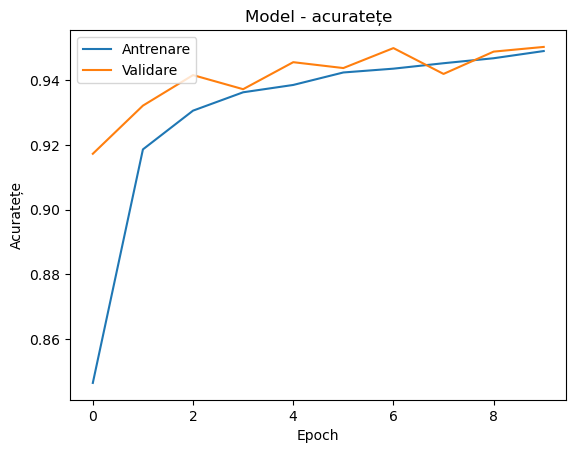

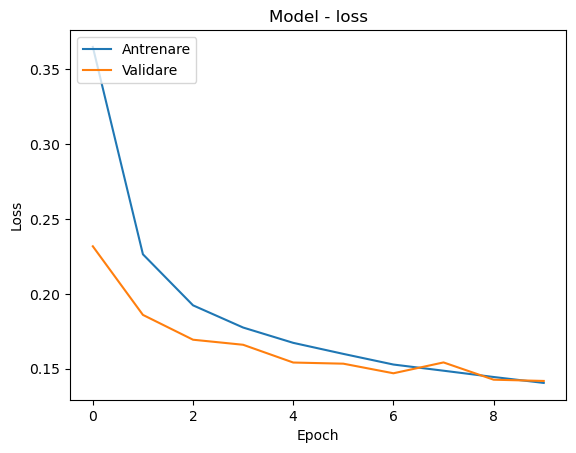

496.7494568824768


In [49]:
callbacks = [reduce_lr]
start_time = time.time()
history = VGG.fit(train_data,
batch_size=BATCH_SIZE,
epochs=EPOCHS,
validation_data=val_data,
callbacks=callbacks,
verbose=1)
end_time = time.time()
elapsed_time = end_time - start_time
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model - acuratețe')
plt.xlabel('Epoch')
plt.ylabel('Acuratețe')
plt.legend(['Antrenare', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_acc_vgg_20ep_without_aug.png")
plt.show()
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model - loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Antrenare', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_loss_vgg_20ep_without_aug.png")
plt.show()
print(elapsed_time)
VGG.save('D:\\malarie\\new_models\\of_vgg_model_20epochs_without_aug.h5')

In [50]:
VGG.evaluate(test_data)

173/173 [==============================] - 5s 29ms/step - loss: 0.1515 - accuracy: 0.9445


[0.15153944492340088, 0.9444847702980042]

[[1290   92]
 [  61 1313]]


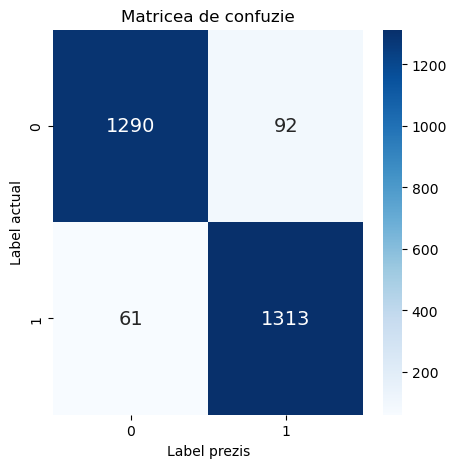

In [51]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = VGG.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_pred_classes.flatten(), y_test)
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, annot_kws={'fontsize':14}, fmt='d')
plt.title('Matricea de confuzie')
plt.xlabel('Label prezis')
plt.ylabel('Label actual')
plt.savefig('D:\\malarie\\new_matrix\\of_confusion_matrix_vgg_20_ep_without_aug.png')
plt.show()

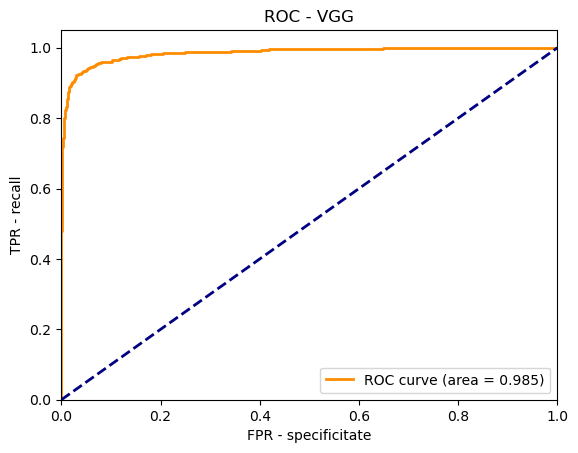

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR - specificitate')
plt.ylabel('TPR - recall')
plt.title('ROC - VGG')
plt.legend(loc="lower right")
plt.savefig("D:\\malarie\\new_graphics\\roc_vgg")
plt.show()

In [53]:
from sklearn.metrics import classification_report
y_pred = VGG.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
# print classification report
target_names = ['Neinfectat', 'Parazitat']  
print(classification_report(y_test, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

  Neinfectat       0.93      0.95      0.94      1351
   Parazitat       0.96      0.93      0.94      1405

    accuracy                           0.94      2756
   macro avg       0.94      0.94      0.94      2756
weighted avg       0.94      0.94      0.94      2756



In [54]:
# Load the saved model
VGG = tf.keras.models.load_model('D:\\malarie\\models\\of_vgg_model_20epochs_without_aug.h5')

## VGG cu ultimele 2 layere neinghetate

Epoch 1/10
1378/1378 [==============================] - 58s 39ms/step - loss: 0.2579 - accuracy: 0.8925 - val_loss: 0.1551 - val_accuracy: 0.9441
Epoch 2/10
1378/1378 [==============================] - 53s 38ms/step - loss: 0.1509 - accuracy: 0.9444 - val_loss: 0.1364 - val_accuracy: 0.9514
Epoch 3/10
1378/1378 [==============================] - 52s 38ms/step - loss: 0.1342 - accuracy: 0.9505 - val_loss: 0.1429 - val_accuracy: 0.9528
Epoch 4/10
1378/1378 [==============================] - 52s 38ms/step - loss: 0.1217 - accuracy: 0.9566 - val_loss: 0.1318 - val_accuracy: 0.9532
Epoch 5/10
1378/1378 [==============================] - 52s 38ms/step - loss: 0.1121 - accuracy: 0.9584 - val_loss: 0.1489 - val_accuracy: 0.9459
Epoch 6/10
1378/1378 [==============================] - 53s 39ms/step - loss: 0.1031 - accuracy: 0.9629 - val_loss: 0.1266 - val_accuracy: 0.9543
Epoch 7/10
1378/1378 [==============================] - 53s 39ms/step - loss: 0.0952 - accuracy: 0.9662 - val_loss: 0.1201 -

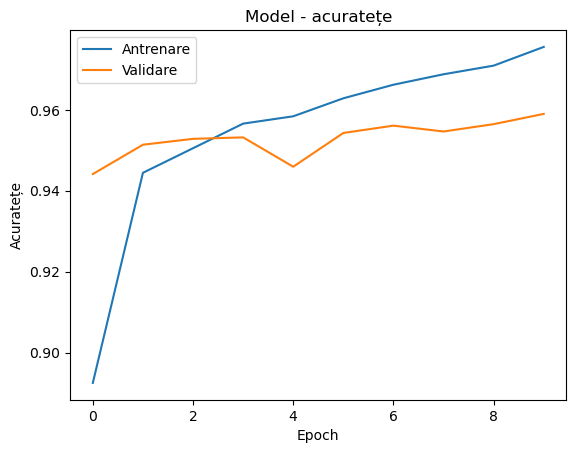

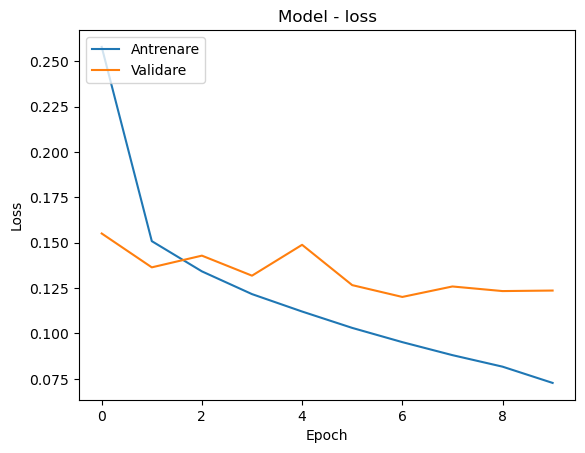

532.0583078861237


In [55]:
import time
callbacks = [reduce_lr]
start_time = time.time()
history = VGG_2.fit(train_data,
batch_size=BATCH_SIZE,
epochs=EPOCHS,
validation_data=val_data,
callbacks=callbacks,
verbose=1)
end_time = time.time()
elapsed_time = end_time - start_time
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model - acuratețe')
plt.xlabel('Epoch')
plt.ylabel('Acuratețe')
plt.legend(['Antrenare', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_acc_vgg_except_2_20ep_without_aug.png")
plt.show()
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model - loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Antrenare', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_loss_vgg_except_2_20ep_without_aug.png")
plt.show()
print(elapsed_time)
VGG_2.save('D:\\malarie\\new_models\\of_vgg_except_2_model_20epochs_without_aug.h5')

In [56]:
VGG_2.evaluate(test_data)

173/173 [==============================] - 5s 30ms/step - loss: 0.1334 - accuracy: 0.9536


[0.1333569437265396, 0.9535558819770813]

[[1324  101]
 [  27 1304]]


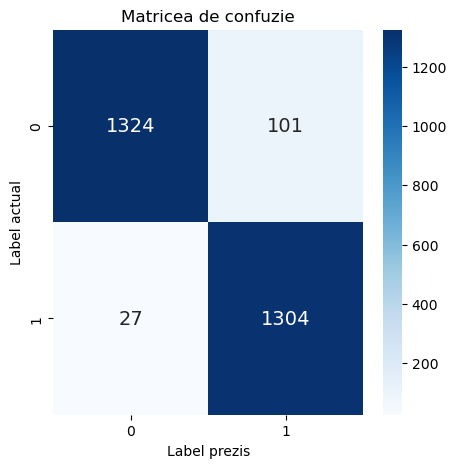

In [57]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = VGG_2.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_pred_classes.flatten(), y_test)
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, annot_kws={'fontsize':14}, fmt='d')
plt.title('Matricea de confuzie')
plt.xlabel('Label prezis')
plt.ylabel('Label actual')
plt.savefig('D:\\malarie\\new_matrix\\of_confusion_matrix_vgg_except_2_20_ep_without_aug.png')
plt.show()

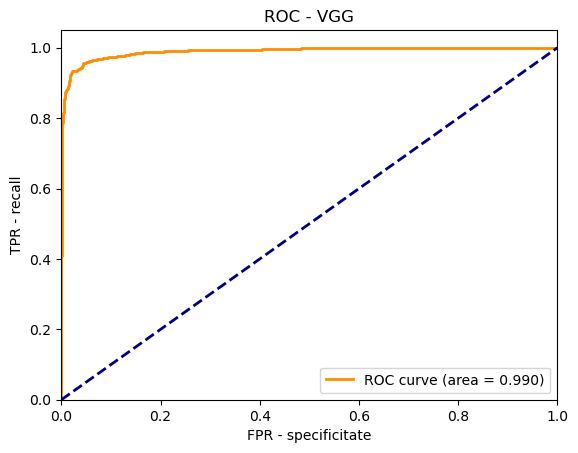

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR - specificitate')
plt.ylabel('TPR - recall')
plt.title('ROC - VGG')
plt.legend(loc="lower right")
plt.savefig("D:\\malarie\\new_graphics\\roc_vgg_except_2")
plt.show()

In [59]:
from sklearn.metrics import classification_report
y_pred = VGG_2.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
# print classification report
target_names = ['Neinfectat', 'Parazitat']  
print(classification_report(y_test, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

  Neinfectat       0.93      0.98      0.95      1351
   Parazitat       0.98      0.93      0.95      1405

    accuracy                           0.95      2756
   macro avg       0.95      0.95      0.95      2756
weighted avg       0.95      0.95      0.95      2756



In [60]:
# Load the saved model
VGG_2 = tf.keras.models.load_model('D:\\malarie\\new_models\\of_vgg_except_2_model_20epochs_without_aug.h5')

## VGG cu ultimele 4 layere neinghetate

Epoch 1/10
1378/1378 [==============================] - 65s 46ms/step - loss: 0.1870 - accuracy: 0.9276 - val_loss: 0.1652 - val_accuracy: 0.9503
Epoch 2/10
1378/1378 [==============================] - 64s 47ms/step - loss: 0.1184 - accuracy: 0.9575 - val_loss: 0.1151 - val_accuracy: 0.9612
Epoch 3/10
1378/1378 [==============================] - 64s 46ms/step - loss: 0.1007 - accuracy: 0.9640 - val_loss: 0.1270 - val_accuracy: 0.9572
Epoch 4/10
1378/1378 [==============================] - 64s 46ms/step - loss: 0.0870 - accuracy: 0.9695 - val_loss: 0.1111 - val_accuracy: 0.9637
Epoch 5/10
1378/1378 [==============================] - 63s 46ms/step - loss: 0.0748 - accuracy: 0.9728 - val_loss: 0.1143 - val_accuracy: 0.9597
Epoch 6/10
1378/1378 [==============================] - 64s 46ms/step - loss: 0.0612 - accuracy: 0.9787 - val_loss: 0.1390 - val_accuracy: 0.9554
Epoch 7/10
1378/1378 [==============================] - 64s 46ms/step - loss: 0.0477 - accuracy: 0.9836 - val_loss: 0.1270 -

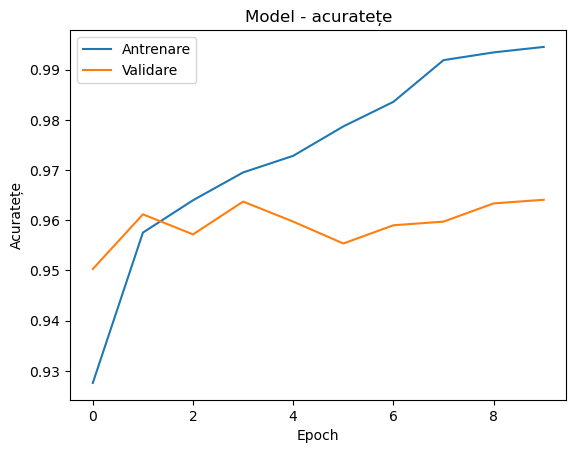

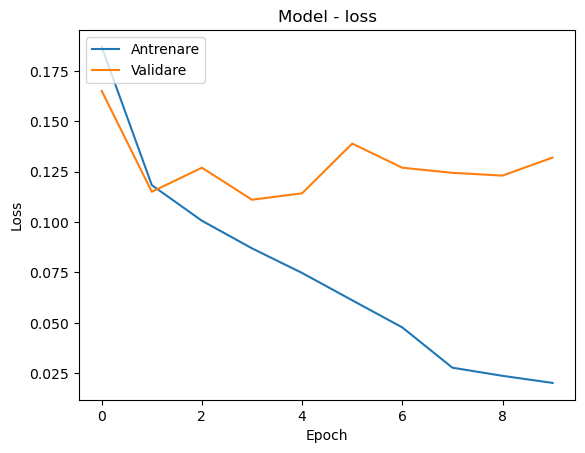

640.4646017551422


In [61]:
import time
callbacks = [reduce_lr]
start_time = time.time()
history = VGG_4.fit(train_data,
batch_size=BATCH_SIZE,
epochs=EPOCHS,
validation_data=val_data,
callbacks=callbacks,
verbose=1)
end_time = time.time()
elapsed_time = end_time - start_time
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model - acuratețe')
plt.xlabel('Epoch')
plt.ylabel('Acuratețe')
plt.legend(['Antrenare', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_acc_vgg_except_4_20ep_without_aug.png")
plt.show()
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model - loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Antrenare', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_loss_vgg_except_4_20ep_without_aug.png")
plt.show()
print(elapsed_time)
VGG_4.save('D:\\malarie\\new_models\\of_vgg_except_4_model_20epochs_without_aug.h5')

In [62]:
VGG_4.evaluate(test_data)

173/173 [==============================] - 5s 28ms/step - loss: 0.1435 - accuracy: 0.9575


[0.14346462488174438, 0.9575471878051758]

[[1309   75]
 [  42 1330]]


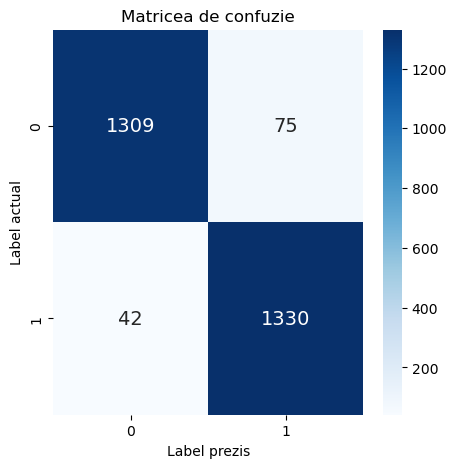

In [63]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = VGG_4.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_pred_classes.flatten(), y_test)
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, annot_kws={'fontsize':14}, fmt='d')
plt.title('Matricea de confuzie')
plt.xlabel('Label prezis')
plt.ylabel('Label actual')
plt.savefig('D:\\malarie\\new_matrix\\of_confusion_matrix_vgg_except_4_20_ep_without_aug.png')
plt.show()

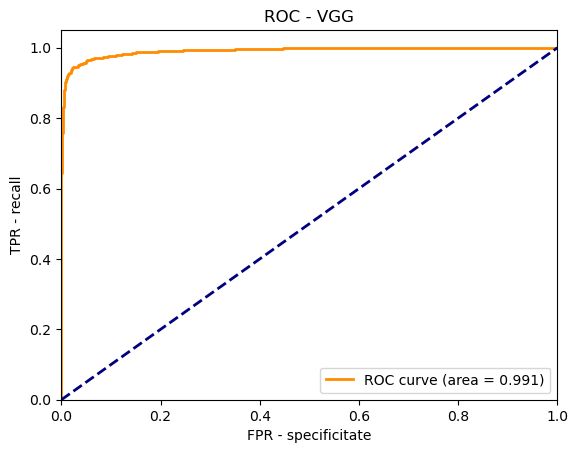

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR - specificitate')
plt.ylabel('TPR - recall')
plt.title('ROC - VGG')
plt.legend(loc="lower right")
plt.savefig("D:\\malarie\\new_graphics\\roc_vgg_except_4")
plt.show()

In [65]:
from sklearn.metrics import classification_report
y_pred = VGG_4.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
# print classification report
target_names = ['Neinfectat', 'Parazitat']  
print(classification_report(y_test, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

  Neinfectat       0.95      0.97      0.96      1351
   Parazitat       0.97      0.95      0.96      1405

    accuracy                           0.96      2756
   macro avg       0.96      0.96      0.96      2756
weighted avg       0.96      0.96      0.96      2756



In [66]:
# Load the saved model
VGG_4 = tf.keras.models.load_model('D:\\malarie\\new_models\\of_vgg_except_4_model_20epochs_without_aug.h5')

## VGG cu niciun layer inghetat

Epoch 1/10
1378/1378 [==============================] - 144s 101ms/step - loss: 0.1493 - accuracy: 0.9457 - val_loss: 0.1045 - val_accuracy: 0.9623
Epoch 2/10
1378/1378 [==============================] - 137s 99ms/step - loss: 0.1006 - accuracy: 0.9658 - val_loss: 0.0872 - val_accuracy: 0.9710
Epoch 3/10
1378/1378 [==============================] - 136s 99ms/step - loss: 0.0845 - accuracy: 0.9692 - val_loss: 0.0956 - val_accuracy: 0.9659
Epoch 4/10
1378/1378 [==============================] - 137s 99ms/step - loss: 0.0688 - accuracy: 0.9746 - val_loss: 0.1047 - val_accuracy: 0.9692
Epoch 5/10
1378/1378 [==============================] - 136s 99ms/step - loss: 0.0560 - accuracy: 0.9804 - val_loss: 0.0966 - val_accuracy: 0.9663
Epoch 6/10
1378/1378 [==============================] - 136s 99ms/step - loss: 0.0297 - accuracy: 0.9898 - val_loss: 0.0933 - val_accuracy: 0.9724
Epoch 7/10
1378/1378 [==============================] - 136s 99ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 

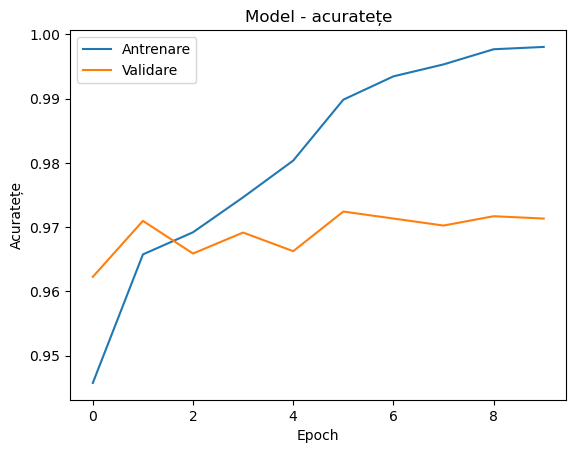

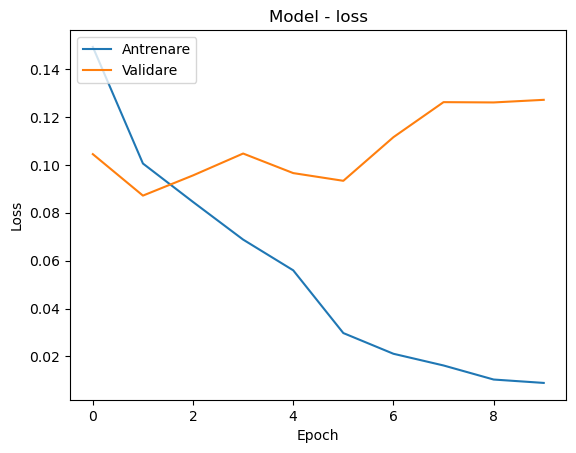

1371.6075549125671


In [67]:
import time
callbacks = [reduce_lr]
start_time = time.time()
history = VGG_all.fit(train_data,
batch_size=BATCH_SIZE,
epochs=EPOCHS,
validation_data=val_data,
callbacks=callbacks,
verbose=1)
end_time = time.time()
elapsed_time = end_time - start_time
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model - acuratețe')
plt.xlabel('Epoch')
plt.ylabel('Acuratețe')
plt.legend(['Antrenare', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_acc_vgg_all_20ep_without_aug.png")
plt.show()
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model - loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Antrenare', 'Validare'], loc='upper left')
plt.savefig("D:\\malarie\\new_plots\\of_plot_loss_vgg_all_20ep_without_aug.png")
plt.show()
print(elapsed_time)
VGG_all.save('D:\\malarie\\new_models\\of_vgg_all_model_20epochs_without_aug.h5')

In [27]:
VGG_all.evaluate(test_data)

173/173 [==============================] - 19s 33ms/step - loss: 0.1470 - accuracy: 0.9670


[0.14701718091964722, 0.9669811129570007]

[[1316   56]
 [  35 1349]]


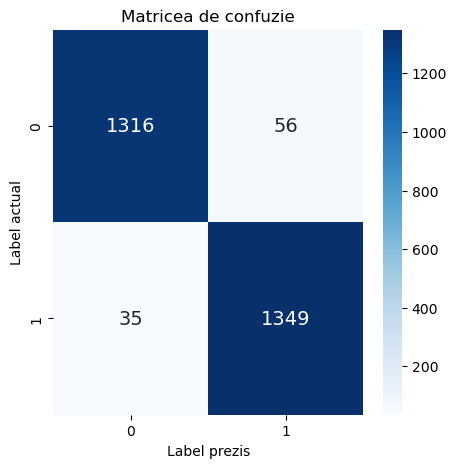

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = VGG_all.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_pred_classes.flatten(), y_test)
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, annot_kws={'fontsize':14}, fmt='d')
plt.title('Matricea de confuzie')
plt.xlabel('Label prezis')
plt.ylabel('Label actual')
plt.savefig('D:\\malarie\\new_matrix\\of_confusion_matrix_vgg_all_20_ep_without_aug.png')
plt.show()

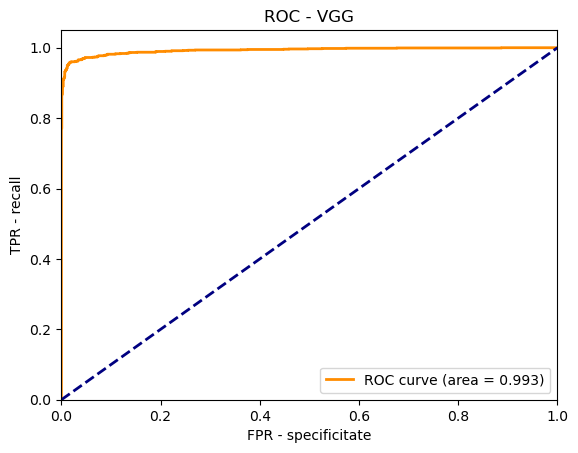

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR - specificitate')
plt.ylabel('TPR - recall')
plt.title('ROC - VGG')
plt.legend(loc="lower right")
plt.savefig("D:\\malarie\\new_graphics\\roc_vgg_all")
plt.show()

In [71]:
from sklearn.metrics import classification_report
y_pred = VGG_all.predict(test_data)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
# print classification report
target_names = ['Neinfectat', 'Parazitat']  
print(classification_report(y_test, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

  Neinfectat       0.96      0.97      0.97      1351
   Parazitat       0.97      0.96      0.97      1405

    accuracy                           0.97      2756
   macro avg       0.97      0.97      0.97      2756
weighted avg       0.97      0.97      0.97      2756



In [26]:
# Load the saved model
VGG_all = tf.keras.models.load_model('D:\\malarie\\new_models\\of_vgg_all_model_20epochs_without_aug.h5')

In [105]:
import pandas as pd

model_names = ['BM','L2FL','L4FL','FT']

metrics = ['  Accuracy', '  Train Time(s)', '    Class  ', 'f1-score']

model1_values = [0.9444,496.7, 'Uninfected', 0.94]
model2_values = ['','', 'Parasitized', 0.94]
model3_values = [0.9535,532.05, '  Uninfected', 0.95]
model4_values = ['','', '  Parasitized', 0.95]
model5_values = [0.9575,640.46, '  Uninfected', 0.96]
model6_values = ['','', '  Parasitized', 0.96]
model7_values = [0.9669,1371.60, '  Uninfected', 0.97]
model8_values = ['', '','  Parasitized', 0.97]

data = {
    'Model': [model_names[0],'',model_names[1],'', model_names[2],'',model_names[3],''],
    metrics[0]: [model1_values[0], model2_values[0], model3_values[0], model4_values[0], model5_values[0], model6_values[0], model7_values[0], model8_values[0]],
    metrics[1]: [model1_values[1], model2_values[1], model3_values[1], model4_values[1], model5_values[1], model6_values[1], model7_values[1], model8_values[1]],
    metrics[2]: [model1_values[2], model2_values[2], model3_values[2], model4_values[2], model5_values[2], model6_values[2], model7_values[2], model8_values[2]],
    metrics[3]: [model1_values[3], model2_values[3], model3_values[3], model4_values[3], model5_values[3], model6_values[3], model7_values[3], model8_values[3]]
}

df = pd.DataFrame(data)

df.set_index('Model', inplace=True)

print(df)


        Accuracy   Train Time(s)        Class    f1-score
Model                                                    
BM        0.9444           496.7     Uninfected      0.94
                                    Parasitized      0.94
L2FL      0.9535          532.05     Uninfected      0.95
                                    Parasitized      0.95
L4FL      0.9575          640.46     Uninfected      0.96
                                    Parasitized      0.96
FT        0.9669          1371.6     Uninfected      0.97
                                    Parasitized      0.97


In [3]:
import pandas as pd

model_names = ['BM','L2FL','L4FL','FT']

metrics = ['  Acuratețe', '  Timp Antrenare(s)', '    Clasă  ', 'F1-score']

model1_values = [0.9444,496.7, ' Neinfectat', 0.94]
model2_values = ['','', 'Parazitat', 0.94]
model3_values = [0.9535,532.05, '  Neinfectat', 0.95]
model4_values = ['','', '  Parazitat', 0.95]
model5_values = [0.9575,640.46, '  Neinfectat', 0.96]
model6_values = ['','', '  Parazitat', 0.96]
model7_values = [0.9669,1371.60, '  Neinfectat', 0.97]
model8_values = ['', '','  Parazitat', 0.97]

data = {
    'Model': [model_names[0],'',model_names[1],'', model_names[2],'',model_names[3],''],
    metrics[0]: [model1_values[0], model2_values[0], model3_values[0], model4_values[0], model5_values[0], model6_values[0], model7_values[0], model8_values[0]],
    metrics[1]: [model1_values[1], model2_values[1], model3_values[1], model4_values[1], model5_values[1], model6_values[1], model7_values[1], model8_values[1]],
    metrics[2]: [model1_values[2], model2_values[2], model3_values[2], model4_values[2], model5_values[2], model6_values[2], model7_values[2], model8_values[2]],
    metrics[3]: [model1_values[3], model2_values[3], model3_values[3], model4_values[3], model5_values[3], model6_values[3], model7_values[3], model8_values[3]]
}

df = pd.DataFrame(data)

df.set_index('Model', inplace=True)

print(df)

        Acuratețe   Timp Antrenare(s)       Clasă    F1-score
Model                                                        
BM         0.9444               496.7    Neinfectat      0.94
                                          Parazitat      0.94
L2FL       0.9535              532.05    Neinfectat      0.95
                                          Parazitat      0.95
L4FL       0.9575              640.46    Neinfectat      0.96
                                          Parazitat      0.96
FT         0.9669              1371.6    Neinfectat      0.97
                                          Parazitat      0.97


In [75]:
import plotly.io as pio
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import mobilenet_v2
from PIL import Image as PilImage

from omnixai.data.image import Image
from omnixai.preprocessing.image import Resize
from omnixai.explainers.vision.specific.gradcam import GradCAM
from omnixai.explainers.vision import VisionExplainer
from omnixai.visualization.dashboard import Dashboard

In [98]:
from tensorflow.keras.applications.vgg16 import preprocess_input

def preprocess(images):
    data = []
    for i in range(len(images)):
        im = tf.keras.preprocessing.image.img_to_array(images[i].to_pil())
        data.append(np.expand_dims(im, axis=0))
    data = np.concatenate(data, axis=0)
    preprocess_input(data)
    return data

In [107]:
def preprocess(images):
    data = []
    for i in range(len(images)):
        im = tf.keras.preprocessing.image.img_to_array(images[i].to_pil())
        data.append(np.expand_dims(im, axis=0))
    data = np.concatenate(data, axis=0)
    data = data.astype('float32') / 255.0 # normalize pixel values
    return data


In [125]:
img = Resize((128, 128)).transform(Image(PilImage.open(X_train[0]).convert('RGB')))

In [126]:
print(img.shape)

(1, 128, 128, 3)


In [110]:
input_img = preprocess(img)
predictions = VGG_4.predict(input_img)
predictions

array([[0.7925585]], dtype=float32)

In [111]:
layer_name = 'block4_conv3'
target_layer = VGG_4.layers[-5]


In [115]:
VGG_all.layers

In [116]:
target_layer = VGG_all.get_layer('vgg16').layers[-2]
target_layer

In [123]:
model.layers[-5]

In [118]:
model = mobilenet_v2.MobileNetV2(include_top=True, weights='imagenet', classes=1000)

In [128]:
from omnixai.explainers.vision import VisionExplainer
from omnixai.visualization.dashboard import Dashboard

explainer = VisionExplainer(
    explainers=["gradcam", "lime", "ig", "ce", "feature_visualization"],
    mode="classification",
    model=VGG_4,
    preprocess=preprocess,
    params={"gradcam": {"target_layer": target_layer},
        # Set the objective for feature visualization
        "feature_visualization": 
          {"objectives": [{"layer": target_layer, "type": "channel", "index": list(range(6))}]}
    },
)
# Generate explanations of GradCAM, LIME, IG and CE
local_explanations = explainer.explain(img)
# Generate explanations of feature visualization
global_explanations = explainer.explain_global()
# Launch the dashboard
dashboard = Dashboard(
    instances=img,
    local_explanations=local_explanations,
    global_explanations=global_explanations
)
dashboard.show()

ValueError: Explainer gradcam -- Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'") at layer "block1_conv1". The following previous layers were accessed without issue: []